## 1주차 과제 : __이진 분류__ (외교/국방/정치)

__Data Exploration__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,docID,date,writerName,title,content,tag
0,1,20230214,머니S,"정부, AI반도체 석·박사 집중 육성… 대학당 '6년간 164억원' 지원",정부가 미국 AI 개발업체인 '오픈AI'(OpenAI)의 '챗GPT'(ChatGPT...,0
1,2,20230215,뉴시스,인사 청탁 대가 금품수수 의혹 전 소방청장 영장 기각,"기사내용 요약 법원 ""피의 사실 일부 다툼 여지, 불구속 상태 방어권 보장 필요"" ...",0
2,3,20230214,아이뉴스24,튀르키예 강진에 우리나라 지하수가 출렁였다,튀르키예에서 발생한 강진에 우리나라의 지하수가 출렁였다는 관측 보고가 나왔다. 한국...,0
3,4,20230215,데일리안,"멸치쇼핑, 2023년 신입 및 경력 사원 대규모 공채 진행",[데일리안 = 박영민 기자] 오픈마켓 멸치쇼핑이 2023년 신입 및 경력 사원을 대...,0
4,5,20230111,뉴스1,"美국방부, 추모의 벽 전사자 명단 오류에 ""유감스러운 실수""","국방부 대변인 ""실수 바로잡기 위해 내무부와 협력""…'오류 발견' 가족 등에 연락 ...",1


### tag

In [3]:
print('Y: ', sum(df['tag']))
print('N: ', len(df)-sum(df['tag']))

Y:  3184
N:  4816


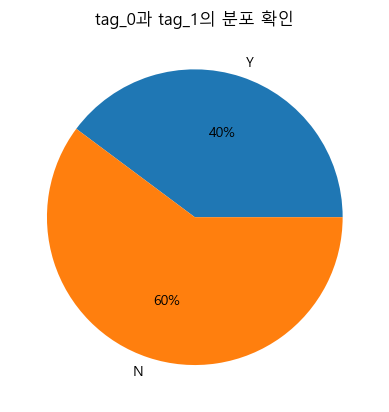

In [48]:
labels = ['Y', 'N']
data = [sum(df['tag']), len(df)-sum(df['tag'])]

#colors = sns.color_pallette('pastel')[0:5]
plt.pie(data, labels=labels, autopct='%.0f%%')
plt.title('tag_0과 tag_1의 분포 확인')
plt.savefig('./graph/분포확인.png')
plt.show()

### writerName

In [5]:
len(df['writerName'].unique()) # 신문사 총 개수

92

In [54]:
df_writer = df[['writerName', 'tag']].groupby('writerName', as_index=False).sum() # 신문사별 tag==1 개수 추출
df_writer.rename(columns={'tag':'tag_1'}, inplace=True)

total_cnt = df[['writerName', 'tag']].groupby(['writerName'], as_index=False).count()['tag'] # 신문사별 기사 개수 추출
df_writer['total_cnt'] = total_cnt

df_writer['writer_score'] = df_writer['tag_1']/df_writer['total_cnt'] # 신문사별 tag==1인 비율 계산

df_writer.sort_values(by='writer_score', ascending=False)

,writerName,tag_1,total_cnt,writer_score
43,문화일보,198,214,0.925234
80,코리아중앙데일리,53,61,0.868852
14,강원도민일보,99,119,0.831933
78,중앙일보,184,231,0.796537
64,연합뉴스,801,1029,0.778426
...,...,...,...,...
32,동아사이언스,0,32,0.000000
30,데일리e스포츠,0,25,0.000000
28,더스쿠프,0,6,0.000000
27,대전일보,0,53,0.000000


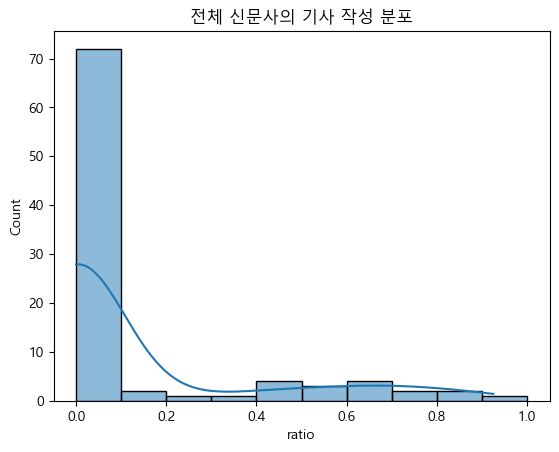

In [53]:
sns.histplot(df_writer['ratio'], binwidth=0.1, kde=True)
plt.title('전체 신문사의 기사 작성 분포')
plt.savefig('./graph/ratio확인1.png')
plt.show()

In [8]:
print('ratio==0인 신문사 개수: ', len(df_writer[df_writer['ratio']==0]))
print('ratio==0인 신문사 비율: ', len(df_writer[df_writer['ratio']==0])/len(df_writer))

ratio==0인 신문사 개수:  65
ratio==0인 신문사 비율:  0.7065217391304348


- 정치/외교/국방 관련 기사를 작성하지 않은 신문사가 압도적으로 많음
- 이들을 단어 분리시켰을 때 공통점이 있는지 확인해보기

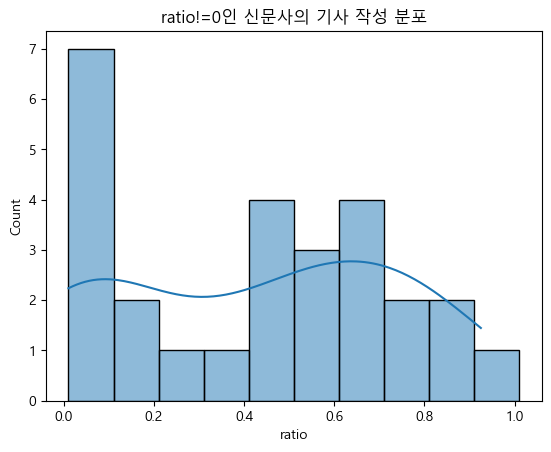

In [52]:
sns.histplot(df_writer[df_writer['ratio']>0]['ratio'], binwidth=0.1, kde=True)
plt.title('ratio!=0인 신문사의 기사 작성 분포')
plt.savefig('./graph/ratio확인2.png')
plt.show()

In [10]:
print('ratio>0.5인 신문사 개수: ', len(df_writer[df_writer['ratio']>0.5]))
print('ratio>0.5인 신문사 비율: ', len(df_writer[df_writer['ratio']>0.5])/len(df_writer))

ratio>0.5인 신문사 개수:  12
ratio>0.5인 신문사 비율:  0.13043478260869565


In [11]:
set(df_writer[df_writer['ratio']>0.5]['writerName'])

{'강원도민일보',
 '경향신문',
 '뉴스1',
 '머니투데이',
 '문화일보',
 '서울경제',
 '아시아경제',
 '연합뉴스',
 '이데일리',
 '조선일보',
 '중앙일보',
 '코리아중앙데일리'}

- 정치/외교/문화가 주 토픽인 신문사는 매우 적은 편 -> 추후 예측 시 'ratio'를 변수로 추가해보면 좋을지도


### title, content

In [12]:
sum(df['title'].isna()) # title에 결측치 확인

0

In [13]:
sum(df['content'].isna()) # content에 결측치 확인

102

content가 없는 신문사들 확인

In [14]:
df_content_na = df[df['content'].isna()]
df_content_na.head()

,docID,date,writerName,title,content,tag
132,133,20230105,뉴스1,"[속보]軍 ""북한 무인기, 용산 비행금지구역 북쪽 끝 일부 지나가""",NaN,1
178,179,20230104,뉴스1,"[속보]軍 ""합동 드론사령부 조기 창설… 드론킬러 드론 신속 개발""",NaN,1
216,217,20230212,코리아중앙데일리,Greek epics,NaN,1
385,386,20230214,뉴스1,"[속보] 한미일 ""北과 대화에 열려 있어…비핵화 대화 복귀 촉구""",NaN,1
399,400,20230203,연합뉴스,"[속보] 美 F-22·F-35B, 韓 F-35A와 서해상에서 또 연합공중훈련",NaN,1


In [15]:
temp = df_content_na[['writerName', 'tag']].groupby('writerName', as_index=False).sum() # content가 NA인 것 중 tag가 1인 개수
temp.rename(columns={'tag':'content_na_tag_1'}, inplace=True)

temp['content_na'] = df_content_na[['writerName', 'tag']].groupby('writerName', as_index=False).count()['tag'] # content가 NA인 개수

temp = pd.merge(temp, df_writer[['writerName', 'total_cnt', 'ratio']], how='left', on='writerName') # writerName 기준으로 total_cnt merge
temp

,writerName,content_na_tag_1,content_na,total_cnt,ratio
0,KBS,0,2,207,0.000000
1,강원일보,0,1,48,0.000000
2,경향신문,0,3,161,0.677019
3,뉴스1,27,29,783,0.699872
4,대전일보,0,1,53,0.000000
5,디지털타임스,0,1,89,0.011236
6,매일경제,0,5,240,0.029167
7,매일신문,0,1,63,0.000000
8,부산일보,0,1,38,0.000000
9,세계일보,0,6,77,0.000000


- 작성한 전체 기사 개수 대비 content가 NA인 기사의 개수가 현저히 적다
- content가 없는 것과 tag가 1인 것과는 큰 상관관계는 없어보인다. 오히려 신문사가 선호하는 주제와 더 상관관계가 있는 듯

### Title

In [16]:
from eunjeon import Mecab

mecab = Mecab()
mecab.pos('안녕하세요')

[('안녕', 'NNG'), ('하', 'XSV'), ('세요', 'EP+EF')]

In [17]:
print(df['title'][0])
mecab.nouns(df['title'][0])

정부, AI반도체 석·박사 집중 육성… 대학당 '6년간 164억원' 지원


['정부', '반도체', '석', '박사', '집중', '육성', '대학당', '년', '간', '억', '원', '지원']

In [18]:
df2 = df.copy()
df2['nouns'] = df2['title'].apply(lambda x: sorted(mecab.nouns(x))) # 제목에서 명사만 추출하여 리스트로 저장
display(df2)

,docID,date,writerName,title,content,tag,nouns
0,1,20230214,머니S,"정부, AI반도체 석·박사 집중 육성… 대학당 '6년간 164억원' 지원",정부가 미국 AI 개발업체인 '오픈AI'(OpenAI)의 '챗GPT'(ChatGPT...,0,"[간, 년, 대학당, 박사, 반도체, 석, 억, 원, 육성, 정부, 지원, 집중]"
1,2,20230215,뉴시스,인사 청탁 대가 금품수수 의혹 전 소방청장 영장 기각,"기사내용 요약 법원 ""피의 사실 일부 다툼 여지, 불구속 상태 방어권 보장 필요"" ...",0,"[금품, 기각, 대가, 소방, 수수, 영장, 의혹, 인사, 전, 청장, 청탁]"
2,3,20230214,아이뉴스24,튀르키예 강진에 우리나라 지하수가 출렁였다,튀르키예에서 발생한 강진에 우리나라의 지하수가 출렁였다는 관측 보고가 나왔다. 한국...,0,"[강진, 나라, 예, 우리, 지하수, 키, 튀르]"
3,4,20230215,데일리안,"멸치쇼핑, 2023년 신입 및 경력 사원 대규모 공채 진행",[데일리안 = 박영민 기자] 오픈마켓 멸치쇼핑이 2023년 신입 및 경력 사원을 대...,0,"[경력, 공채, 규모, 년, 멸치, 사원, 쇼핑, 신입, 진행]"
4,5,20230111,뉴스1,"美국방부, 추모의 벽 전사자 명단 오류에 ""유감스러운 실수""","국방부 대변인 ""실수 바로잡기 위해 내무부와 협력""…'오류 발견' 가족 등에 연락 ...",1,"[美, 국방부, 명단, 벽, 실수, 오류, 유감, 전사자, 추모]"
...,...,...,...,...,...,...,...
7995,7996,20230104,이데일리,"외교부, 오는 12일 日강제징용 해법 토론회 연다",국회서 한일의원연맹과 공동 개최 [이데일리 권오석 기자] 외교부가 오는 12일 일제...,1,"[日, 강제, 외교부, 일, 징용, 토론회, 해법]"
7996,7997,20230215,아시아경제,"교원단체, '유치원' 명칭은 일제 잔재…'유아학교'로 변경해야",교육부가 2025년부터 유치원과 어린이집을 하나로 통합하겠다는 계획을 밝힌 가운데 ...,0,"[교원, 단체, 명칭, 변경, 유아, 유치원, 일제, 잔재, 학교]"
7997,7998,20230212,뉴스1,내일 한일외교차관회담… '강제동원 해법' 이견 좁힐까,13일 워싱턴 한미일 차관협의회 계기 양자회담 예정 日 '사죄·배상' 방식 쟁점… ...,1,"[강제, 동원, 외교, 이견, 일, 차관, 해법, 회담]"
7998,7999,20230214,매일경제,최상호 국립오페라단 단장,문화체육관광부가 재단법인 국립오페라단 단장 겸 예술감독에 최상호 한국예술종합학교 음...,0,"[국립오페라단, 단장, 최상호]"


In [19]:
df2_0 = df2[df2['tag']==0] # df2에서 tag == 0인 dataframe
df2_1 = df2[df2['tag']==1] # df2에서 tag == 1인 dataframe


In [20]:
import itertools

list_nouns_0= list(itertools.chain(*list(df2_0['nouns'])))
df_nouns_0 = pd.DataFrame(list_nouns_0).value_counts()
df_nouns_0.head()

년    293
원    285
만    251
억    242
일    189
dtype: int64

In [21]:
list_nouns_1= list(itertools.chain(*list(df2_1['nouns'])))
df_nouns_1 = pd.DataFrame(list_nouns_1).value_counts().rename_axis('nouns').reset_index(name='cnt')

df_nouns_1.head()

,nouns,cnt
0,北,374
1,장관,254
2,美,246
3,일,240
4,미,217


In [22]:
print('tag==0 인 경우, 명사 개수 : ', len(set(list_nouns_0)))
print('tag==0 인 경우, 명사 개수 : ', len(set(list_nouns_1)))
print('위 두 개 교집합 개수 : ', len(set(list_nouns_0) & set(list_nouns_1)))

diff_nouns = list(set(list_nouns_1) - set(list_nouns_0)) # 차집합(set1-set0)
diff_nouns.sort()
print('tag 1 - tag 0 명사 : ', len(diff_nouns))

tag==0 인 경우, 명사 개수 :  8039
tag==0 인 경우, 명사 개수 :  4576
위 두 개 교집합 개수 :  2427
tag 1 - tag 0 명사 :  2149


In [23]:
diff_nouns = pd.DataFrame({'nouns':diff_nouns})

In [24]:
df_nouns = pd.merge(diff_nouns, df_nouns_1)
df_nouns.sort_values(by='cnt', ascending=False, inplace=True)
df_nouns

,nouns,cnt
625,무인기,169
2035,핵,152
698,박진,149
1299,외교부,133
1715,징용,81
...,...,...
872,비시,1
871,비스,1
870,비서실,1
868,비서,1


<AxesSubplot:xlabel='cnt', ylabel='Count'>

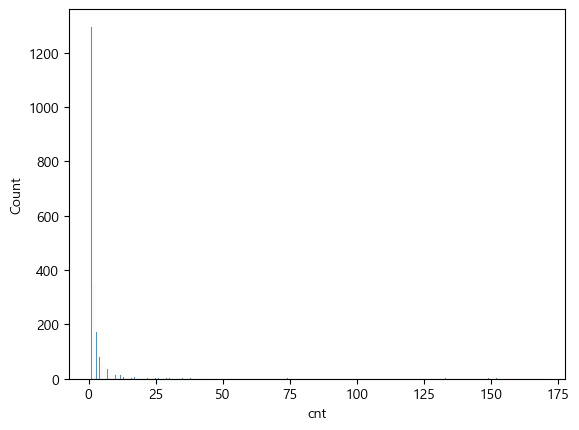

In [25]:
sns.histplot(data=df_nouns, x='cnt')

In [26]:
df_nouns['cnt'].quantile(q=0.70)

2.0

In [27]:
df_nouns['cnt'].quantile(q=0.9)

5.0

In [28]:
len(df_nouns[df_nouns['cnt']<=2]) / len(df_nouns)

0.7664029781293625

- cnt가 2개 이하인 단어가 전체의 70퍼센트..
- 상위 10퍼 정도로만 단어집합을 만들어야할지 숫자에 대한 논의가 있어야할지..
- 이건 단순히 train set에 한정된 경우라서 과적합 문제가 있을 수도 있다. 아예 버려야할 set이 될지도

In [29]:
keywords = df_nouns[df_nouns['cnt'] > 5]['nouns'] #우선은 상위 10퍼센트의 단어들만 저장
keywords.to_csv('keywords.txt', index=False)

In [30]:
df2['nouns'] = df2['nouns'].apply(set)
df2['contain_keywords'] = df2['nouns'].apply(lambda x: 1 if (len( x & set(keywords) )>0) else 0)
df2

,docID,date,writerName,title,content,tag,nouns,contain_keywords
0,1,20230214,머니S,"정부, AI반도체 석·박사 집중 육성… 대학당 '6년간 164억원' 지원",정부가 미국 AI 개발업체인 '오픈AI'(OpenAI)의 '챗GPT'(ChatGPT...,0,"{원, 석, 육성, 반도체, 지원, 정부, 억, 간, 집중, 박사, 년, 대학당}",0
1,2,20230215,뉴시스,인사 청탁 대가 금품수수 의혹 전 소방청장 영장 기각,"기사내용 요약 법원 ""피의 사실 일부 다툼 여지, 불구속 상태 방어권 보장 필요"" ...",0,"{대가, 소방, 청탁, 전, 금품, 인사, 영장, 의혹, 청장, 수수, 기각}",0
2,3,20230214,아이뉴스24,튀르키예 강진에 우리나라 지하수가 출렁였다,튀르키예에서 발생한 강진에 우리나라의 지하수가 출렁였다는 관측 보고가 나왔다. 한국...,0,"{우리, 예, 강진, 지하수, 나라, 키, 튀르}",0
3,4,20230215,데일리안,"멸치쇼핑, 2023년 신입 및 경력 사원 대규모 공채 진행",[데일리안 = 박영민 기자] 오픈마켓 멸치쇼핑이 2023년 신입 및 경력 사원을 대...,0,"{공채, 신입, 진행, 사원, 멸치, 경력, 년, 규모, 쇼핑}",0
4,5,20230111,뉴스1,"美국방부, 추모의 벽 전사자 명단 오류에 ""유감스러운 실수""","국방부 대변인 ""실수 바로잡기 위해 내무부와 협력""…'오류 발견' 가족 등에 연락 ...",1,"{美, 유감, 명단, 벽, 전사자, 추모, 실수, 오류, 국방부}",1
...,...,...,...,...,...,...,...,...
7995,7996,20230104,이데일리,"외교부, 오는 12일 日강제징용 해법 토론회 연다",국회서 한일의원연맹과 공동 개최 [이데일리 권오석 기자] 외교부가 오는 12일 일제...,1,"{징용, 일, 해법, 日, 강제, 외교부, 토론회}",1
7996,7997,20230215,아시아경제,"교원단체, '유치원' 명칭은 일제 잔재…'유아학교'로 변경해야",교육부가 2025년부터 유치원과 어린이집을 하나로 통합하겠다는 계획을 밝힌 가운데 ...,0,"{유치원, 변경, 명칭, 유아, 일제, 잔재, 교원, 단체, 학교}",0
7997,7998,20230212,뉴스1,내일 한일외교차관회담… '강제동원 해법' 이견 좁힐까,13일 워싱턴 한미일 차관협의회 계기 양자회담 예정 日 '사죄·배상' 방식 쟁점… ...,1,"{일, 해법, 차관, 이견, 강제, 동원, 회담, 외교}",1
7998,7999,20230214,매일경제,최상호 국립오페라단 단장,문화체육관광부가 재단법인 국립오페라단 단장 겸 예술감독에 최상호 한국예술종합학교 음...,0,"{국립오페라단, 최상호, 단장}",0


In [31]:
df2[df2['tag'] != df2['contain_keywords']].value_counts('tag')

tag
1    1186
dtype: int64

In [32]:
1186/8000

0.14825